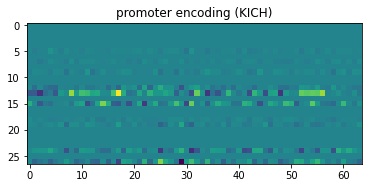

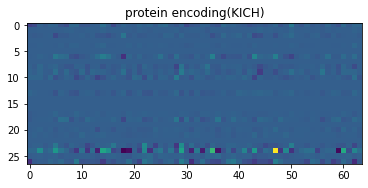

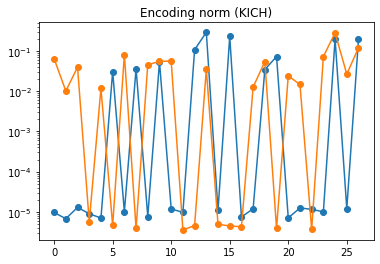

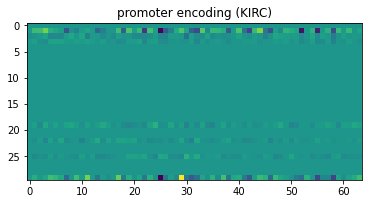

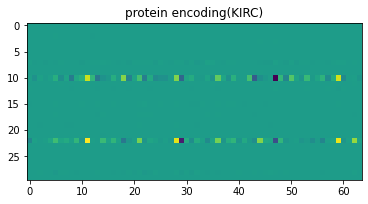

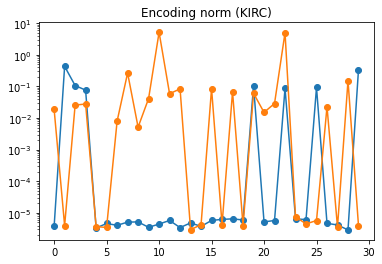

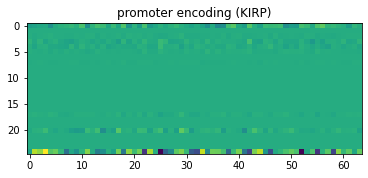

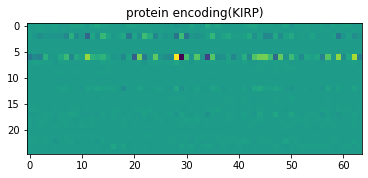

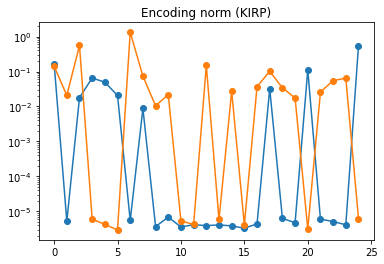

In [1]:
from matplotlib import pyplot as plt
import h5py
import numpy as np


# Loading and demoing the structure of the files

filename = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/raw/KICH/TCGA-KL-8323-01A-21D-2310-10.h5"

with h5py.File(filename, "r") as f:

    prom = f["data"]["promoter"][()]
    prot = f["data"]["protein"][()]

plt.imshow(prom)
plt.title("promoter encoding (KICH)")
plt.show()

plt.imshow(prot)
plt.title("protein encoding(KICH)")
plt.show()

# Why are some norms so small?
# Perhaps we can drop the genese were the norm is small for both promoter and the protein?
plt.semilogy(np.abs(prom).sum(1), marker="o", label="promoter")
plt.semilogy(np.abs(prot).sum(1), marker="o", label="protein")
plt.title("Encoding norm (KICH)")
plt.show()


# Another example

filename = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/raw/KIRC/TCGA-6D-AA2E-01A-11D-A36X-10.h5"

with h5py.File(filename, "r") as f:

    prom = f["data"]["promoter"][()]
    prot = f["data"]["protein"][()]

plt.imshow(prom)
plt.title("promoter encoding (KIRC)")
plt.show()

plt.imshow(prot)
plt.title("protein encoding(KIRC)")
plt.show()

plt.semilogy(np.abs(prom).sum(1), marker="o", label="promoter")
plt.semilogy(np.abs(prot).sum(1), marker="o", label="protein")
plt.title("Encoding norm (KIRC)")
plt.show()


# Another example

filename = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/raw/KIRP/TCGA-2Z-A9J8-01A-11D-A42J-10.h5"

with h5py.File(filename, "r") as f:

    prom = f["data"]["promoter"][()]
    prot = f["data"]["protein"][()]

plt.imshow(prom)
plt.title("promoter encoding (KIRP)")
plt.show()

plt.imshow(prot)
plt.title("protein encoding(KIRP)")
plt.show()

plt.semilogy(np.abs(prom).sum(1), marker="o", label="promoter")
plt.semilogy(np.abs(prot).sum(1), marker="o", label="protein")
plt.title("Encoding norm (KIRP)")
plt.show()

Error files:  {'KICH': [], 'KIRC': [], 'KIRP': []}
Cancer types per folder files numbers: {'KICH': 1, 'KIRC': 1, 'KIRP': 1}
Duplicates per type: {'KICH': 0, 'KIRC': 0, 'KIRP': 0}
Samples without data:  {'KICH': [], 'KIRC': [], 'KIRP': []}


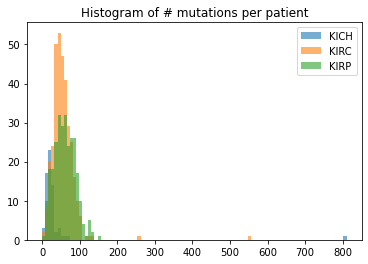

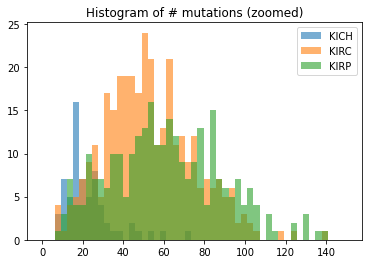

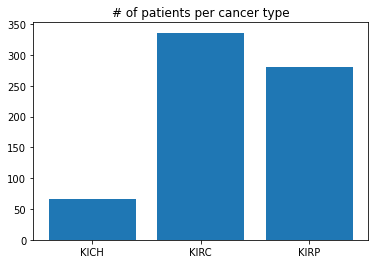

In [2]:
# Looking at the distribution of the mutations

from matplotlib import pyplot as plt
import h5py
import numpy as np
import os
from os.path import isfile, join

types = ["KICH", "KIRC", "KIRP"]

dataroot = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/raw/"

cancer_types = {type: [] for type in types}
num_mutations = {type: [] for type in types}
error_samples = {type: [] for type in types}
sample_IDs = {type: [] for type in types}
nodata = {type: [] for type in types}
for type in types:
    datapath = dataroot + type
    files = [
        join(datapath, f) for f in os.listdir(datapath) if isfile(join(datapath, f))
    ]
    for file in files:
        with h5py.File(file, "r") as f:

            try:
                cancer_types[type].append(f["label"]["sample_meta"]["tumor"][()])
                num_mutations[type].append(len(f["meta"]["mutated_gene_list"][()]))
                sample_IDs[type].append(f["label"]["sample_id"][()])
                if "data" not in f.keys():
                    nodata[type].append(file)
            except:
                error_samples[type].append(file)

# The reference gene file is the only one that errors out
print("Error files: ", error_samples)

# Types of cancer per folder:
print(
    "Cancer types per folder files numbers:",
    {key: len(set(value)) for key, value in cancer_types.items()},
)

print(
    "Duplicates per type:",
    {key: len(set(value)) - len(value) for key, value in sample_IDs.items()},
)

print("Samples without data: ", nodata)


[
    plt.hist(value, bins=np.linspace(0, 810, 100), label=key, alpha=0.6)
    for key, value in num_mutations.items()
]
plt.title("Histogram of # mutations per patient")
plt.legend()
plt.show()

[
    plt.hist(value, bins=np.linspace(0, 150, 50), label=key, alpha=0.6)
    for key, value in num_mutations.items()
]
plt.title("Histogram of # mutations (zoomed)")
plt.legend()
plt.show()


plt.bar(cancer_types.keys(), [len(el) for el in cancer_types.values()])
plt.title("# of patients per cancer type")
plt.show()

Epoch: 10, Loss: 0.0938, Train Acc: 0.4980
Test Loss: 0.0958, Acc: 0.4706
Epoch: 20, Loss: 0.0885, Train Acc: 0.5176
Test Loss: 0.103, Acc: 0.4647
Epoch: 30, Loss: 0.0835, Train Acc: 0.5039
Test Loss: 0.104, Acc: 0.4588
Epoch: 40, Loss: 0.0765, Train Acc: 0.5549
Test Loss: 0.148, Acc: 0.4765
Epoch: 50, Loss: 0.068, Train Acc: 0.6392
Test Loss: 0.17, Acc: 0.3941
Epoch: 60, Loss: 0.0628, Train Acc: 0.6510
Test Loss: 0.183, Acc: 0.4176
Epoch: 70, Loss: 0.0612, Train Acc: 0.7000
Test Loss: 0.254, Acc: 0.4529
Epoch: 80, Loss: 0.0503, Train Acc: 0.7373
Test Loss: 0.356, Acc: 0.4471
Epoch: 90, Loss: 0.0463, Train Acc: 0.7882
Test Loss: 0.326, Acc: 0.4588
Epoch: 100, Loss: 0.0393, Train Acc: 0.8039
Test Loss: 0.633, Acc: 0.4941


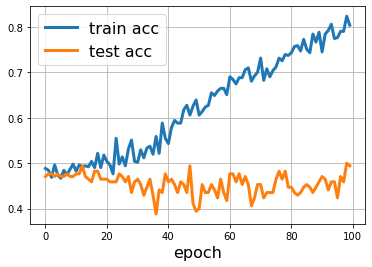

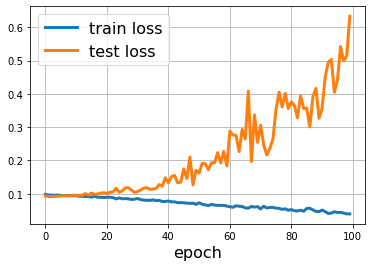

AUCs one-vs-rest: Train: 0.960, Test: 0.554
AUCs one-vs-one: Train: 0.960, Test: 0.558


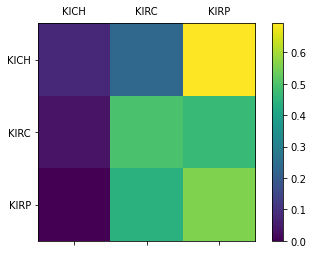

In [3]:
# Training on kidney data using GCN architecture (3 way classification)

# Hyperparameters etc:

arch = "GCN"
batch = 10
parall = False
lr = 0.006

import sys
sys.path.insert(0,'..')
import TCGAData
import torch, torch_geometric.transforms as T, torch.nn.functional as F
import matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from torch_geometric.loader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from arch.net import *

if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = "cpu"

root = "/mnt/home/sgolkar/projects/cancer-net/data/kidney"
files = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/samples.txt"
label_mapping = ["KICH", "KIRC", "KIRP"]
dataset = TCGAData.TCGADataset(
    root=root,
    files=files,
    label_mapping=label_mapping,
    gene_graph="global.geneSymbol.gz",
)

rng = np.random.default_rng(2022)
rnd_perm = rng.permutation(len(dataset))
train_indices = list(rnd_perm[: 3 * len(dataset) // 4])
test_indices = list(rnd_perm[3 * len(dataset) // 4 :])
train_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=True,
)
test_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=True,
)

assert len(train_indices) + len(test_indices) == len(
    dataset
), "Train test split with overlap or unused samples!"

model = GCNNet(num_classes=3).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss


def train(epoch, report=True):
    model.train()

    # if epoch == 30:
    #     for param_group in optimizer.param_groups:
    #         param_group["lr"] = lr * 0.5

    total_loss = 0
    correct = 0
    num_samps = 0
    for data in train_loader:
        if not parall:
            data = data.to(device)
        optimizer.zero_grad()

        output = model(data)
        output = output.squeeze()

        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y

        if len(output.shape) == 1:
            output = output.unsqueeze(0)
        loss = criterion(output, y)

        pred = output.max(1)[1]
        correct += pred.eq(y).sum().item()
        total_loss += loss
        loss.backward()
        optimizer.step()
        num_samps += len(y)
    if report:
        print(
            "Epoch: {:02d}, Loss: {:.3g}, Train Acc: {:.4f}".format(
                epoch, total_loss / num_samps, correct / num_samps
            )
        )

    return total_loss / num_samps, correct / num_samps


def test():
    model.eval()
    correct = 0

    total_loss = 0
    num_samps = 0
    for data in test_loader:
        if not parall:
            data = data.to(device)
        output = model(data)
        output = output.squeeze()

        pred = output.max(1)[1]
        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y
        loss = criterion(output, y)
        total_loss += loss.item()

        correct += pred.eq(y).sum().item()
        num_samps += len(y)
    return total_loss / num_samps, correct / num_samps


train_losses = []
train_acces = []
test_acces = []
test_losses = []
for epoch in range(1, 101):
    report = (epoch) % 10 == 0
    train_loss, train_acc = train(epoch, report=report)
    test_loss, test_acc = test()
    train_losses.append(train_loss.cpu().detach().numpy())
    test_losses.append(test_loss)
    train_acces.append(train_acc)
    test_acces.append(test_acc)
    if report:
        print("Test Loss: {:.3g}, Acc: {:.4f}".format(test_loss, test_acc))

plt.figure()
plt.plot(train_acces, label="train acc", linewidth=3)
plt.plot(test_acces, label="test acc", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()
plt.plot(train_losses, c="tab:blue", label="train loss", linewidth=3)
plt.plot(test_losses, c="tab:orange", label="test loss", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

train_auc_ovo = roc_auc_score(ys, outs, multi_class="ovo")
train_auc_ovr = roc_auc_score(ys, outs, multi_class="ovr")

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

test_auc_ovo = roc_auc_score(ys, outs, multi_class="ovo")
test_auc_ovr = roc_auc_score(ys, outs, multi_class="ovr")

print(
    "AUCs one-vs-rest: Train: {:.3f}, Test: {:.3f}".format(train_auc_ovr, test_auc_ovr)
)
print(
    "AUCs one-vs-one: Train: {:.3f}, Test: {:.3f}".format(train_auc_ovo, test_auc_ovo)
)

confusion = confusion_matrix(y_true=ys, y_pred=outs.argmax(1), normalize="true")

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False)
im = ax.imshow(confusion)
ax.set_xticks([0, 1, 2], label_mapping)
ax.set_yticks([0, 1, 2], label_mapping)
plt.colorbar(im)
plt.show()

Epoch: 20, Loss: 0.0777, Train Acc: 0.6647
Test Loss: 0.107, Acc: 0.5176
Epoch: 40, Loss: 0.0418, Train Acc: 0.8333
Test Loss: 0.14, Acc: 0.5294
Epoch: 60, Loss: 0.0256, Train Acc: 0.9039
Test Loss: 0.224, Acc: 0.4647
Epoch: 80, Loss: 0.0153, Train Acc: 0.9451
Test Loss: 0.216, Acc: 0.4706
Epoch: 100, Loss: 0.0137, Train Acc: 0.9451
Test Loss: 0.27, Acc: 0.5412
Epoch: 120, Loss: 0.00983, Train Acc: 0.9647
Test Loss: 0.224, Acc: 0.5059
Epoch: 140, Loss: 0.00611, Train Acc: 0.9784
Test Loss: 0.222, Acc: 0.4882
Epoch: 160, Loss: 0.0198, Train Acc: 0.9314
Test Loss: 0.225, Acc: 0.4588
Epoch: 180, Loss: 0.0118, Train Acc: 0.9510
Test Loss: 0.234, Acc: 0.4941
Epoch: 200, Loss: 0.0137, Train Acc: 0.9490
Test Loss: 0.235, Acc: 0.4941


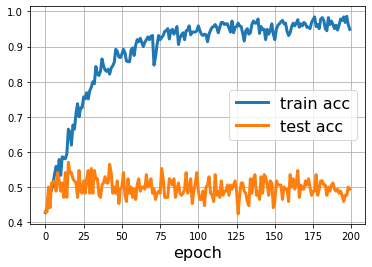

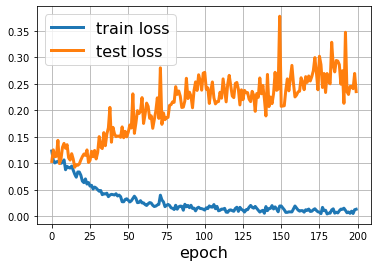

AUCs one-vs-rest: Train: 0.999, Test: 0.636
AUCs one-vs-one: Train: 0.999, Test: 0.639


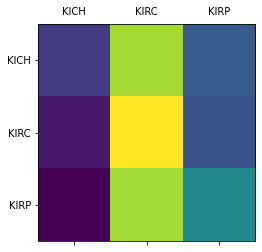

In [4]:
# Training on kidney data using GCN2 architecture  (3 way classification)

# Hyperparameters etc:

arch = "GCN2"
batch = 10
parall = False
lr = 0.003

import sys
sys.path.insert(0,'..')
import TCGAData
import torch, torch_geometric.transforms as T, torch.nn.functional as F
import matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from torch_geometric.loader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from arch.net import *

if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = "cpu"

root = "/mnt/home/sgolkar/projects/cancer-net/data/kidney"
files = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/samples.txt"
label_mapping = ["KICH", "KIRC", "KIRP"]

pre_transform = T.Compose([T.GCNNorm(), T.ToSparseTensor()])
dataset = TCGAData.TCGADataset(
    root=root,
    files=files,
    label_mapping=label_mapping,
    gene_graph="global.geneSymbol.gz",
    transform=pre_transform,
    suffix="sparse",
)

rng = np.random.default_rng(2022)
rnd_perm = rng.permutation(len(dataset))
train_indices = list(rnd_perm[: 3 * len(dataset) // 4])
test_indices = list(rnd_perm[3 * len(dataset) // 4 :])
train_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=True,
)
test_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=True,
)

assert len(train_indices) + len(test_indices) == len(
    dataset
), "Train test split with overlap or unused samples!"

model = GCN2Net(
    hidden_channels=2048,
    num_layers=4,
    num_classes=3,
    alpha=0.5,
    theta=1.0,
    shared_weights=False,
    dropout=0.2,
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss


def train(epoch, report=True):
    model.train()

    # if epoch == 30:
    #     for param_group in optimizer.param_groups:
    #         param_group["lr"] = lr * 0.5

    total_loss = 0
    correct = 0
    num_samps = 0
    for data in train_loader:
        if not parall:
            data = data.to(device)
        optimizer.zero_grad()

        output = model(data)
        output = output.squeeze()

        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y

        if len(output.shape) == 1:
            output = output.unsqueeze(0)
        loss = criterion(output, y)

        pred = output.max(1)[1]
        correct += pred.eq(y).sum().item()
        total_loss += loss
        loss.backward()
        optimizer.step()
        num_samps += len(y)
    if report:
        print(
            "Epoch: {:02d}, Loss: {:.3g}, Train Acc: {:.4f}".format(
                epoch, total_loss / num_samps, correct / num_samps
            )
        )

    return total_loss / num_samps, correct / num_samps


def test():
    model.eval()
    correct = 0

    total_loss = 0
    num_samps = 0
    for data in test_loader:
        if not parall:
            data = data.to(device)
        output = model(data)
        output = output.squeeze()

        pred = output.max(1)[1]
        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y
        loss = criterion(output, y)
        total_loss += loss.item()

        correct += pred.eq(y).sum().item()
        num_samps += len(y)
    return total_loss / num_samps, correct / num_samps


train_losses = []
train_acces = []
test_acces = []
test_losses = []
for epoch in range(1, 201):
    report = (epoch) % 20 == 0
    train_loss, train_acc = train(epoch, report=report)
    test_loss, test_acc = test()
    train_losses.append(train_loss.cpu().detach().numpy())
    test_losses.append(test_loss)
    train_acces.append(train_acc)
    test_acces.append(test_acc)
    if report:
        print("Test Loss: {:.3g}, Acc: {:.4f}".format(test_loss, test_acc))

plt.figure()
plt.plot(train_acces, label="train acc", linewidth=3)
plt.plot(test_acces, label="test acc", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()
plt.plot(train_losses, c="tab:blue", label="train loss", linewidth=3)
plt.plot(test_losses, c="tab:orange", label="test loss", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

train_auc_ovo = roc_auc_score(ys, outs, multi_class="ovo")
train_auc_ovr = roc_auc_score(ys, outs, multi_class="ovr")

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

test_auc_ovo = roc_auc_score(ys, outs, multi_class="ovo")
test_auc_ovr = roc_auc_score(ys, outs, multi_class="ovr")

print(
    "AUCs one-vs-rest: Train: {:.3f}, Test: {:.3f}".format(train_auc_ovr, test_auc_ovr)
)
print(
    "AUCs one-vs-one: Train: {:.3f}, Test: {:.3f}".format(train_auc_ovo, test_auc_ovo)
)

confusion = confusion_matrix(y_true=ys, y_pred=outs.argmax(1), normalize="true")

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False)
ax.imshow(confusion)
ax.set_xticks([0, 1, 2], label_mapping)
ax.set_yticks([0, 1, 2], label_mapping)
plt.show()

Epoch: 10, Loss: 0.0658, Train Acc: 0.6039
Test Loss: 0.0726, Acc: 0.5529
Epoch: 20, Loss: 0.0602, Train Acc: 0.6039
Test Loss: 0.109, Acc: 0.5529
Epoch: 30, Loss: 0.0553, Train Acc: 0.6843
Test Loss: 0.196, Acc: 0.5471
Epoch: 40, Loss: 0.0491, Train Acc: 0.6922
Test Loss: 0.208, Acc: 0.5471
Epoch: 50, Loss: 0.048, Train Acc: 0.7137
Test Loss: 0.369, Acc: 0.5765
Epoch: 60, Loss: 0.0402, Train Acc: 0.8039
Test Loss: 0.34, Acc: 0.5588
Epoch: 70, Loss: 0.0416, Train Acc: 0.7843
Test Loss: 0.393, Acc: 0.5353
Epoch: 80, Loss: 0.0325, Train Acc: 0.8471
Test Loss: 0.468, Acc: 0.5529
Epoch: 90, Loss: 0.0276, Train Acc: 0.8667
Test Loss: 0.554, Acc: 0.5765
Epoch: 100, Loss: 0.0256, Train Acc: 0.8804
Test Loss: 0.651, Acc: 0.5529
Epoch: 110, Loss: 0.0248, Train Acc: 0.8902
Test Loss: 0.815, Acc: 0.5765
Epoch: 120, Loss: 0.0187, Train Acc: 0.9059
Test Loss: 0.901, Acc: 0.5471
Epoch: 130, Loss: 0.0188, Train Acc: 0.9059
Test Loss: 0.98, Acc: 0.5647
Epoch: 140, Loss: 0.0171, Train Acc: 0.9216
Test 

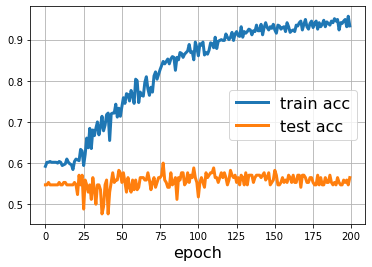

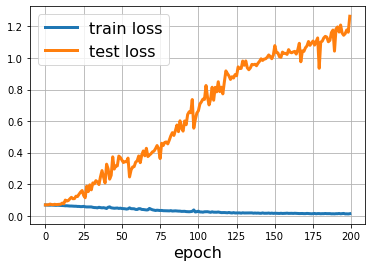

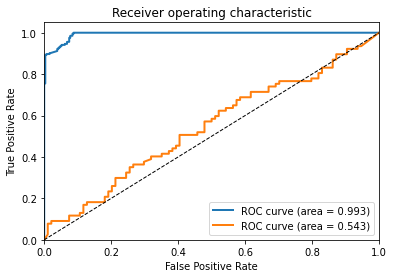

In [5]:
# Training on kidney data using GCN architecture (binary classification)

# Hyperparameters etc:

arch = "GCN"
batch = 10
parall = False
lr = 0.005

import sys
sys.path.insert(0,'..')
import TCGAData
import torch, torch_geometric.transforms as T, torch.nn.functional as F
import matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc
from torch_geometric.loader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from arch.net import *

if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = "cpu"

root = "/mnt/home/sgolkar/projects/cancer-net/data/kidney"
files = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/samples.txt"
label_mapping = {"KICH": 0, "KIRC": 0, "KIRP": 1}
dataset = TCGAData.TCGADataset(
    root=root,
    files=files,
    label_mapping=label_mapping,
    gene_graph="global.geneSymbol.gz",
    suffix="binary",
)


rng = np.random.default_rng(2022)
rnd_perm = rng.permutation(len(dataset))
train_indices = list(rnd_perm[: 3 * len(dataset) // 4])
test_indices = list(rnd_perm[3 * len(dataset) // 4 :])
train_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=True,
)
test_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=True,
)

assert len(train_indices) + len(test_indices) == len(
    dataset
), "Train test split with overlap or unused samples!"

model = GCNNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss


def train(epoch, report=True):
    model.train()

    if epoch == 70:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.5

    if epoch == 120:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.1

    total_loss = 0
    correct = 0
    num_samps = 0
    for data in train_loader:
        if not parall:
            data = data.to(device)
        optimizer.zero_grad()

        output = model(data)
        output = output.squeeze()

        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y

        if len(output.shape) == 1:
            output = output.unsqueeze(0)
        loss = criterion(output, y)

        pred = output.max(1)[1]
        correct += pred.eq(y).sum().item()
        total_loss += loss
        loss.backward()
        optimizer.step()
        num_samps += len(y)
    if report:
        print(
            "Epoch: {:02d}, Loss: {:.3g}, Train Acc: {:.4f}".format(
                epoch, total_loss / num_samps, correct / num_samps
            )
        )

    return total_loss / num_samps, correct / num_samps


def test():
    model.eval()
    correct = 0

    total_loss = 0
    num_samps = 0
    for data in test_loader:
        if not parall:
            data = data.to(device)
        output = model(data)
        output = output.squeeze()

        pred = output.max(1)[1]
        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y
        loss = criterion(output, y)
        total_loss += loss.item()

        correct += pred.eq(y).sum().item()
        num_samps += len(y)
    return total_loss / num_samps, correct / num_samps


train_losses = []
train_acces = []
test_acces = []
test_losses = []
for epoch in range(1, 201):
    report = (epoch) % 10 == 0
    train_loss, train_acc = train(epoch, report=report)
    test_loss, test_acc = test()
    train_losses.append(train_loss.cpu().detach().numpy())
    test_losses.append(test_loss)
    train_acces.append(train_acc)
    test_acces.append(test_acc)
    if report:
        print("Test Loss: {:.3g}, Acc: {:.4f}".format(test_loss, test_acc))

plt.figure()
plt.plot(train_acces, label="train acc", linewidth=3)
plt.plot(test_acces, label="test acc", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()
plt.plot(train_losses, c="tab:blue", label="train loss", linewidth=3)
plt.plot(test_losses, c="tab:orange", label="test loss", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

fpr_train, tpr_train, _ = roc_curve(ys, outs[:, 1])
train_auc = auc(fpr_train, tpr_train)

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

fpr_test, tpr_test, _ = roc_curve(ys, outs[:, 1])
test_auc = auc(fpr_test, tpr_test)

plt.plot(
    fpr_train, tpr_train, lw=2, label="ROC curve (area = %0.3f)" % train_auc,
)
plt.plot(
    fpr_test, tpr_test, lw=2, label="ROC curve (area = %0.3f)" % test_auc,
)
plt.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Epoch: 20, Loss: 0.0545, Train Acc: 0.7569
Test Loss: 0.0836, Acc: 0.5765
Epoch: 40, Loss: 0.0323, Train Acc: 0.8667
Test Loss: 0.118, Acc: 0.5706
Epoch: 60, Loss: 0.0212, Train Acc: 0.9235
Test Loss: 0.143, Acc: 0.5941
Epoch: 80, Loss: 0.0149, Train Acc: 0.9451
Test Loss: 0.175, Acc: 0.5588
Epoch: 100, Loss: 0.00869, Train Acc: 0.9706
Test Loss: 0.185, Acc: 0.5765
Epoch: 120, Loss: 0.011, Train Acc: 0.9588
Test Loss: 0.202, Acc: 0.5765
Epoch: 140, Loss: 0.0102, Train Acc: 0.9784
Test Loss: 0.228, Acc: 0.5471
Epoch: 160, Loss: 0.0031, Train Acc: 0.9922
Test Loss: 0.234, Acc: 0.5529
Epoch: 180, Loss: 0.0054, Train Acc: 0.9843
Test Loss: 0.221, Acc: 0.5765
Epoch: 200, Loss: 0.00439, Train Acc: 0.9843
Test Loss: 0.238, Acc: 0.5588


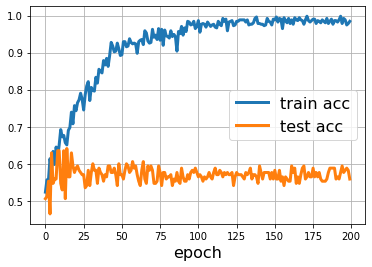

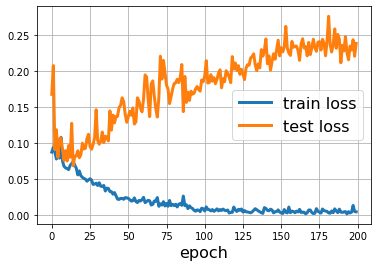

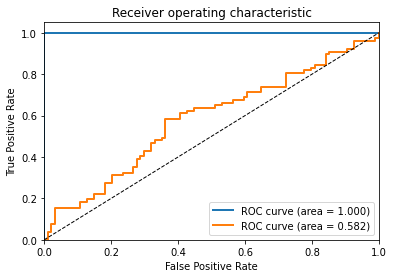

In [6]:
# Training on brain data using GCN2 architecture

# Hyperparameters etc:

arch = "GCN2"
batch = 10
parall = False
lr = 0.005

import sys
sys.path.insert(0,'..')
import TCGAData
import torch, torch_geometric.transforms as T, torch.nn.functional as F
import matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc
from torch_geometric.loader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from arch.net import *

if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = "cpu"

root = "/mnt/home/sgolkar/projects/cancer-net/data/kidney"
files = "/mnt/home/sgolkar/projects/cancer-net/data/kidney/samples.txt"
label_mapping = {"KICH": 0, "KIRC": 0, "KIRP": 1}
pre_transform = T.Compose([T.GCNNorm(), T.ToSparseTensor()])
dataset = TCGAData.TCGADataset(
    root=root,
    files=files,
    label_mapping=label_mapping,
    gene_graph="global.geneSymbol.gz",
    transform=pre_transform,
    suffix="sparse_binary",
)


rng = np.random.default_rng(2022)
rnd_perm = rng.permutation(len(dataset))
train_indices = list(rnd_perm[: 3 * len(dataset) // 4])
test_indices = list(rnd_perm[3 * len(dataset) // 4 :])
train_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=True,
)
test_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=True,
)

assert len(train_indices) + len(test_indices) == len(
    dataset
), "Train test split with overlap or unused samples!"

model = GCN2Net(
    hidden_channels=2048,
    num_layers=4,
    alpha=0.5,
    theta=1.0,
    shared_weights=False,
    dropout=0.2,
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss


def train(epoch, report=True):
    model.train()

    if epoch == 40:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.5

    if epoch == 90:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.1

    total_loss = 0
    correct = 0
    num_samps = 0
    for data in train_loader:
        if not parall:
            data = data.to(device)
        optimizer.zero_grad()

        output = model(data)
        output = output.squeeze()

        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y

        if len(output.shape) == 1:
            output = output.unsqueeze(0)
        loss = criterion(output, y)

        pred = output.max(1)[1]
        correct += pred.eq(y).sum().item()
        total_loss += loss
        loss.backward()
        optimizer.step()
        num_samps += len(y)
    if report:
        print(
            "Epoch: {:02d}, Loss: {:.3g}, Train Acc: {:.4f}".format(
                epoch, total_loss / num_samps, correct / num_samps
            )
        )

    return total_loss / num_samps, correct / num_samps


def test():
    model.eval()
    correct = 0

    total_loss = 0
    num_samps = 0
    for data in test_loader:
        if not parall:
            data = data.to(device)
        output = model(data)
        output = output.squeeze()

        pred = output.max(1)[1]
        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y
        loss = criterion(output, y)
        total_loss += loss.item()

        correct += pred.eq(y).sum().item()
        num_samps += len(y)
    return total_loss / num_samps, correct / num_samps


train_losses = []
train_acces = []
test_acces = []
test_losses = []
for epoch in range(1, 201):
    report = (epoch) % 20 == 0
    train_loss, train_acc = train(epoch, report=report)
    test_loss, test_acc = test()
    train_losses.append(train_loss.cpu().detach().numpy())
    test_losses.append(test_loss)
    train_acces.append(train_acc)
    test_acces.append(test_acc)
    if report:
        print("Test Loss: {:.3g}, Acc: {:.4f}".format(test_loss, test_acc))

plt.figure()
plt.plot(train_acces, label="train acc", linewidth=3)
plt.plot(test_acces, label="test acc", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()
plt.plot(train_losses, c="tab:blue", label="train loss", linewidth=3)
plt.plot(test_losses, c="tab:orange", label="test loss", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

fpr_train, tpr_train, _ = roc_curve(ys, outs[:, 1])
train_auc = auc(fpr_train, tpr_train)

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

fpr_test, tpr_test, _ = roc_curve(ys, outs[:, 1])
test_auc = auc(fpr_test, tpr_test)

plt.plot(
    fpr_train, tpr_train, lw=2, label="ROC curve (area = %0.3f)" % train_auc,
)
plt.plot(
    fpr_test, tpr_test, lw=2, label="ROC curve (area = %0.3f)" % test_auc,
)
plt.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()